# 🧬 LDA on Iris Dataset
Linear Discriminant Analysis (LDA) for classification using the Iris dataset.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = sns.load_dataset('iris')

# Head of the Dataset
print("🔹 Head of the dataset:")
print(df.head())


🔹 Head of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


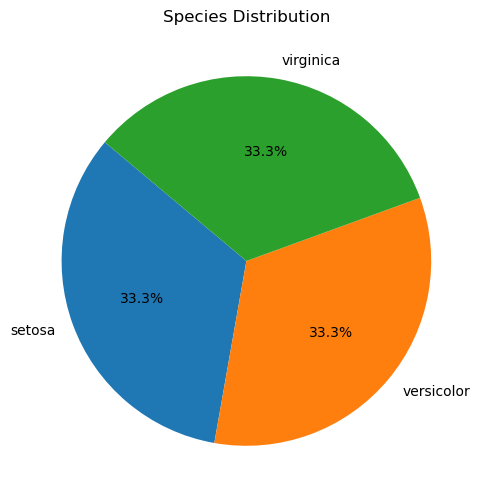

In [38]:
# Pie chart of species distribution
species_counts = df['species'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Species Distribution')
plt.show()

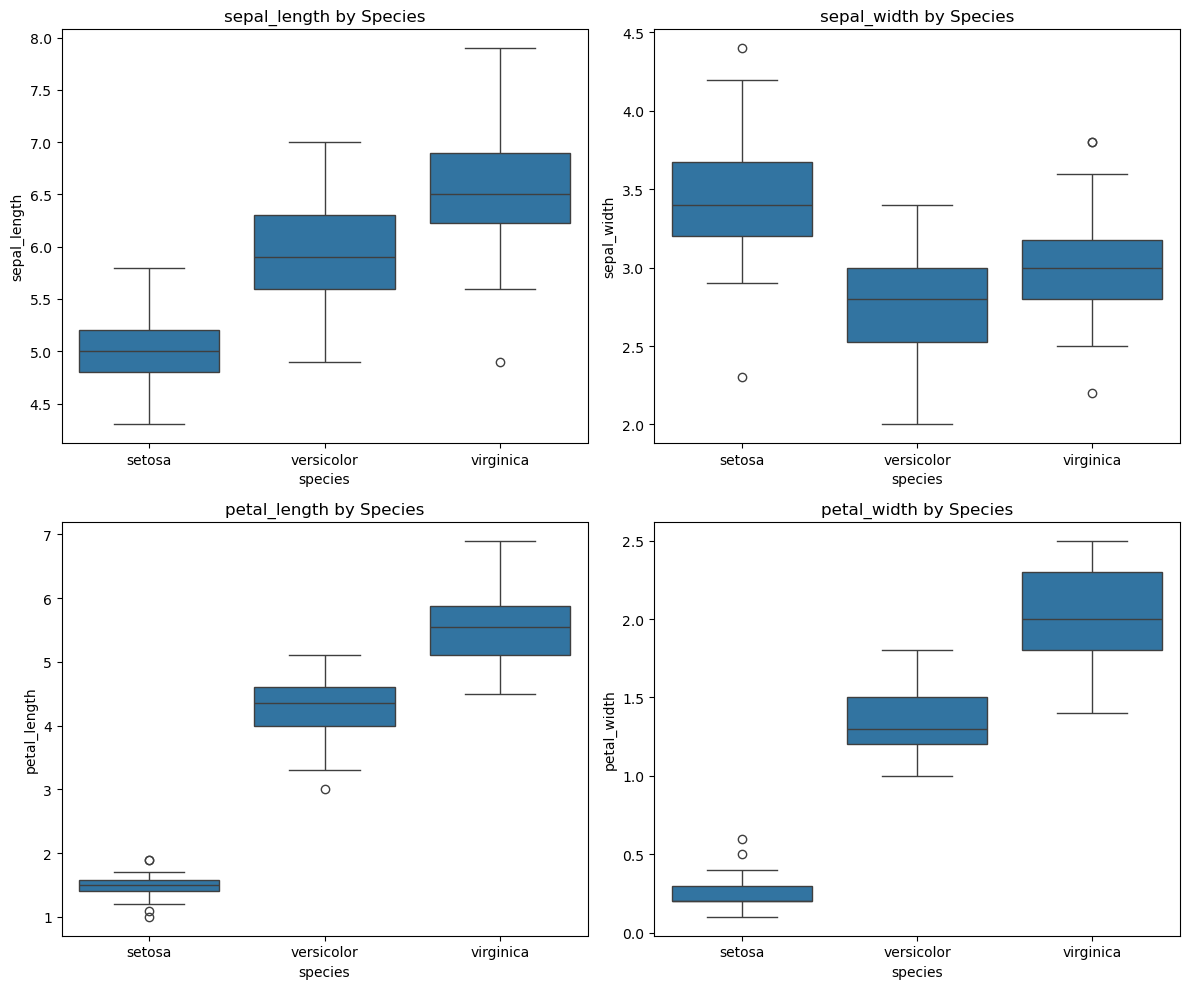

In [39]:
#Box Plots by Species (Grouped by Feature)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

In [40]:
#Filter Data by Species
setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']
virginica = df[df['species'] == 'virginica']
print(setosa.head())
print(versicolor.head())
print(virginica.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
53           5.5          2.3           4.0          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virgi

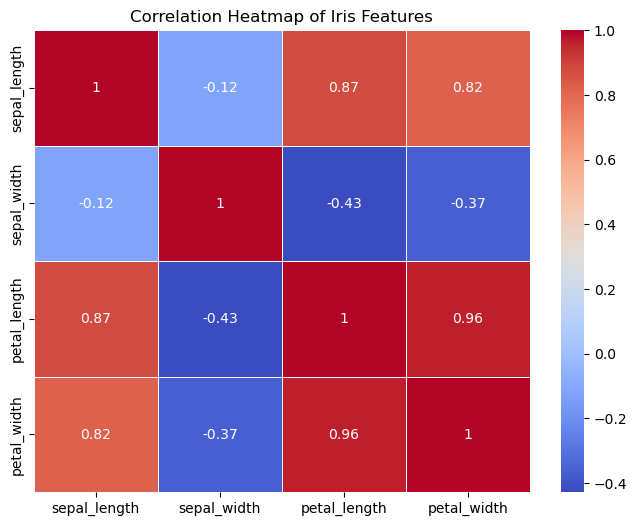

In [41]:
#Heatmap of Feature Correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

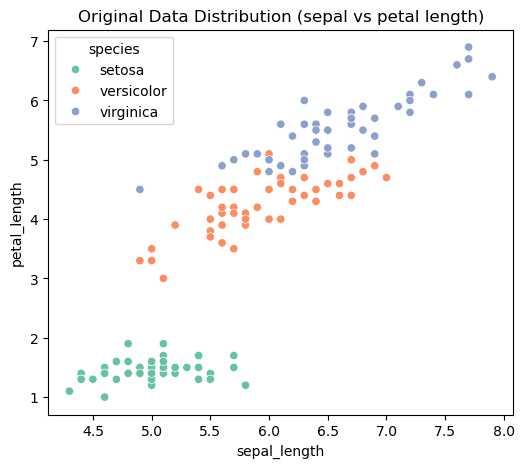

In [42]:
#Original Distribution before dimensionality reduction
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('iris')

# Original data (sepal and petal length as an example)
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species', palette='Set2')
plt.title('Original Data Distribution (sepal vs petal length)')
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
#: Loads the Iris dataset and extracts features (X), target values (y), names of the features, and class labels.
def load_data():
    data = load_iris()
    X = data.data
    y = data.target
    feature_names = data.feature_names
    class_labels = data.target_names
    return X, y, feature_names, class_labels

In [9]:
#Splits the dataset into training and testing subsets, which is crucial for evaluating the model's performance later.
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [24]:
# Standardizes the dataset so that each feature contributes equally to the analysis. 
# This is important because LDA is sensitive to the scales of the input features
def standardize_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [13]:
# Calculates the mean of each feature for each class. 
#This is used to determine how far each class's features deviate from the mean
def compute_mean_vectors(X_train, y_train):
    class_labels = np.unique(y_train)
    mean_vectors = []
    for cl in class_labels:
        mean_vectors.append(np.mean(X_train[y_train == cl], axis=0))
    return mean_vectors

In [25]:
#Calculates the scatter matrix for within each class. 
#It measures how much the data points of a class vary from the mean vector of that class.

def within_class_scatter_matrix(X_train, y_train, mean_vectors):
    class_labels = np.unique(y_train)
    n_features = X_train.shape[1]
    S_W = np.zeros((n_features, n_features))
    for cl, mv in zip(class_labels, mean_vectors):
        class_sc_mat = np.zeros((n_features, n_features))
        for row in X_train[y_train == cl]:
            row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
            class_sc_mat += (row - mv).dot((row - mv).T)
        S_W += class_sc_mat
    return S_W

In [16]:
# Computes the scatter matrix between the classes.
# It measures how much the mean vectors of each class deviate from the overall mean of the data, weighted by the number of samples in each class.
def between_class_scatter_matrix(mean_vectors, overall_mean, y_train):
    n_features = mean_vectors[0].size
    S_B = np.zeros((n_features, n_features) )
    for i, mean_vec in enumerate(mean_vectors):
        n = np.sum(y_train == i)
        mean_vec = mean_vec.reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    return S_B

In [19]:
# find the directions (eigenvectors) that best separate the classes in the Iris dataset, using the within-class and between-class scatter matrices. 
# It helps to determine how to project the dataset into a new space that maximizes class separation.

def lda_eigen(S_W, S_B):
    eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(s_W).dot(S_8))
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
    eigen_pairs.sort(key=lambda k: k[0], reverse=True)
    return eigen_pairs

In [20]:
#constructing of a transformation matrix that is used to project the original feature space into a lower-dimensional space. 
# The dimensionality of the new space is determined by 𝑘, which is typically the number of classes minus one for LDA
def select_k_eigenvectors(eigen_pairs, k):
    W = np.hstack([eigen_pairs[i][1].reshape(-1, 1) for i in range(k)])
    return W

In [21]:
#projecting the original dataset into a lower-dimensional space that aims to maximize the separation between the classes. 
# The transformation is achieved by multiplying the original data matrix 𝑋 by the matrix 𝑊, which contains the selected 
eigenvectors.
def project_data(X, W):
    X_lda = X.dot(W)
    return X_lda

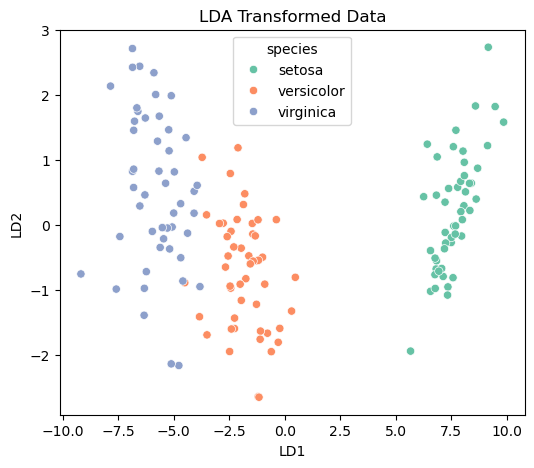

In [44]:
# LDA Projection (after dimensionality reduction)
plt.figure(figsize=(6, 5))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='species', palette='Set2')
plt.title('LDA Transformed Data')
plt.show()
